<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Масштабирование-данных-с-помощью-TF-IDF." data-toc-modified-id="Масштабирование-данных-с-помощью-TF-IDF.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Масштабирование данных с помощью TF-IDF.</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Качество-прогноза" data-toc-modified-id="Качество-прогноза-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Качество прогноза</a></span></li><li><span><a href="#Модель-логистической-регрессии" data-toc-modified-id="Модель-логистической-регрессии-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модель логистической регрессии</a></span></li><li><span><a href="#Модель-линейных-опорных-векторов" data-toc-modified-id="Модель-линейных-опорных-векторов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Модель линейных опорных векторов</a></span></li><li><span><a href="#Подбор-порога" data-toc-modified-id="Подбор-порога-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Подбор порога</a></span></li><li><span><a href="#Ансамбль-смешивания" data-toc-modified-id="Ансамбль-смешивания-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Ансамбль смешивания</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

Импортируем нужные библиотеки.

In [1]:
!pip install tqdm 
!pip install en_core_web_sm
!pip install langdetect
!pip install sidetable

     |████████████████████████████████| 981 kB 1.1 MB/s eta 0:00:01
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=7ab37a663c588562df1d140e6521b8322cde300ffd86dc5ac5c71f7475a32579
  Stored in directory: /home/jovyan/.cache/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect


In [2]:
import pandas as pd
import numpy as np
from numpy import hstack


from langdetect import detect

from matplotlib import pyplot as plt

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

import re

import sidetable

import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm  import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV

from tqdm import notebook

import nltk
from nltk.corpus import wordnet
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [3]:
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Для себя выгрузил уже лемматизированный `.csv` файл и работал с ним, подбирая гиперпараметры моделей,ниже ссылки на гугл-диск, надеюсь работает.**

Создаем путь к файлу с данными.

In [4]:
path = '/datasets/toxic_comments.csv'
path2 = 'MyDrive/Colab Notebooks/yandex_proj_13/toxic_comments.csv'
path3 = 'MyDrive/Colab Notebooks/yandex_proj_13/LEMMAS_ALL_line.csv'
path4 = 'LEMMAS_ALL_line.csv'
path5 = 'https://drive.google.com/file/d/1mra5hTXat1rG5HhxwwTr97B-IcjCuKFj/view?usp=sharing'
path5 = 'https://drive.google.com/uc?id=' + path5.split('/')[-2]

url = 'https://drive.google.com/file/d/1_hDXELgZARKgcIF7ahqmEoMTP9WgoacD/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

Откроем файл с текстом комментариев и разметкой о токсичности правок.

In [5]:
try:
    df = pd.read_csv(path)
except Exception as err:
    try:
        df = pd.read_csv(path[10:])
    except Exception as err:
        try:
            from google.colab import drive
            df = pd.read_csv(path2)
        except Exception as err:
            try:
                df = pd.read_csv(path5)
            except Exception as err:
                print('Ошибка чтения файла df:', repr(err))

In [6]:
# параметр для seed в random_state
STATE = 12345

In [7]:
df.head()

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


В нашем распоряжении 159571 комментарий с разметкой о его токсичности. Первые строчки на английском языке. Проверим, все ли комментарии написаны на одном языке.

Посмотрим на соотношение токсичных и нетоксичных комментариев.

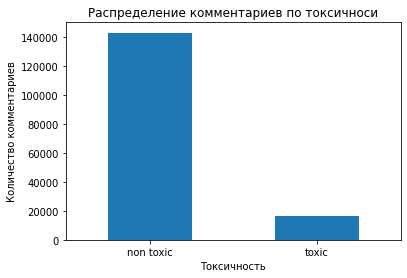

In [9]:
df.groupby('toxic').text.count().sort_values(ascending=False).plot(kind='bar', rot=0)
plt.title('Распределение комментариев по токсичноси')
plt.ylabel('Количество комментариев')
plt.xlabel('Токсичность')
plt.xticks([0, 1], ['non toxic', 'toxic'])
plt.show()

In [10]:
df.toxic.mean()

0.10161213369158527

Видим, что только 10% из комментариев помечены как токсичные. Нужно будет учесть это при разбиении выборок для обучения и предсказания моделей.

Уберем из текста ссылки на страницы.

In [11]:
def delete_links(data):
    data = re.sub(r'^https?:\/\/.*[\r\n]*', '', data, flags=re.MULTILINE)
    return data

In [12]:
df['text'] = df['text'].apply(delete_links)

In [13]:
df.head(20)

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0
5,5,"""\n\nCongratulations from me as well, use the ...",0
6,6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,7,Your vandalism to the Matt Shirvington article...,0
8,8,Sorry if the word 'nonsense' was offensive to ...,0
9,9,alignment on this subject and which are contra...,0


Заменим основные сокращения английского языка.

In [14]:
df['text'] = df['text'].transform(lambda x: x\
.replace(" won't ", ' will not ')\
.replace("can't ", 'cannot ')\
.replace("n't ", ' not ')\
.replace("'s ", ' is ')\
.replace("'m ", ' am ')\
.replace("'ll ", ' will ')\
.replace("'d ", ' would ') \
.replace("'re ", ' are ')\
.replace("'ve ", ' have ')\
.replace("\n", " ")
                                 )

In [15]:
df.head()

,Unnamed: 0,text,toxic
0,0,Explanation Why the edits made under my userna...,0
1,1,D'aww! He matches this background colour I am ...,0
2,2,"Hey man, I am really not trying to edit war. I...",0
3,3,""" More I cannot make any real suggestions on i...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


Переведем текст комментариев в нижний регистр и оставим только английские слова.

In [16]:
df['text'] = df['text'].apply(str.lower)

In [17]:
df.head()

,Unnamed: 0,text,toxic
0,0,explanation why the edits made under my userna...,0
1,1,d'aww! he matches this background colour i am ...,0
2,2,"hey man, i am really not trying to edit war. i...",0
3,3,""" more i cannot make any real suggestions on i...",0
4,4,"you, sir, are my hero. any chance you remember...",0


In [18]:
df['text'] = df['text'].transform(lambda x: re.sub(r'[^a-z ]', ' ', x))

In [19]:
df.head()

,Unnamed: 0,text,toxic
0,0,explanation why the edits made under my userna...,0
1,1,d aww he matches this background colour i am ...,0
2,2,hey man i am really not trying to edit war i...,0
3,3,more i cannot make any real suggestions on i...,0
4,4,you sir are my hero any chance you remember...,0


Не будем переводить данные в кодировку Юникод, так как у нас английский текст в ASCII.

### Лемматизация

Проведем лемматизацию комментариев [с соответствующим POS-тегом](https://webdevblog.ru/podhody-lemmatizacii-s-primerami-v-python/).

In [20]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [21]:
lemmatizer = WordNetLemmatizer()

Лемматизация занимает примерно 22 минуты, поэтому мы однажды прогнали этот код и выгрузили новый `.csv` файл с уже лемматизированным текстом. Теперь мы код лемматизации закомментируем и подгрузим с Гугл диска уже готовый документ с лемматизацией.

In [22]:
# %%time
# df['text'] = df['text'].transform(lambda x: ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in x.split()]))

In [23]:
try:
    df = pd.read_csv(path4,
                    index_col=0)
except Exception as err:
    try:
        df = pd.read_csv(url, 
                         index_col=0
#                          engine='python'
                        )
    except Exception as err:
        print('Ошибка чтения файла df:', repr(err))

In [24]:
df.head()

,text,toxic
0,explanation why the edits make under my userna...,0
1,d aww he match this background colour i be see...,0
2,hey man i be really not try to edit war it be ...,0
3,more i cannot make any real suggestion on impr...,0
4,you sir be my hero any chance you remember wha...,0


После предобработки проверим таблицу на пропуски.

In [25]:
def display_missing(data):
    try:
        display(data.stb.missing(style=True))
    except Exception as err:
        try:
            display(data.isna().sum())
        except Exception as err:
            print('Ошибка чтения файла df:', repr(err))

In [26]:
display_missing(df)

,missing,total,percent
text,93,"159,571",0.06%
toxic,0,"159,571",0.00%


Удалим образовавшиеся пропуски в данных после удаления ссылок и/или стоп-слов.

In [27]:
df.dropna(inplace=True)

Разделим данные на тренировочный, валидационный и тестовый набор.

In [28]:
X_train_valid, X_test, target_train_valid, target_test = train_test_split(
    df['text'],
    df['toxic'],
    test_size=0.2,
    random_state=STATE,
    stratify=df['toxic']
) 
X_train, X_valid, target_train, target_valid = train_test_split(
    X_train_valid,
    target_train_valid,
    test_size=0.25,
    random_state=STATE,
    stratify=target_train_valid
) 

Проверим процентное содержание токсичных комментариев в каждой из выборок.

In [29]:
target_train_valid.mean(), target_train.mean(), target_valid.mean(), target_test.mean()

(0.10169146117790911,
 0.10168676713416801,
 0.10170554301479809,
 0.10167419112114372)

В каждой выборке примерно по 10% токсичных комментариев, что согласуется с общей таблицей.

### Масштабирование данных с помощью TF-IDF.

При построении пайплайна будем проводить токенизацию комментариев с построением словаря важности известных слов, использовав стоп-слова.

In [30]:
stop_words = set(stopwords.words('english'))

stop_words = set([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in stop_words])

In [31]:
count_tf_idf = TfidfVectorizer()

Выведем размер получившихся выборок.

In [32]:
X_train.shape, X_valid.shape, X_train_valid.shape, X_test.shape 

((95686,), (31896,), (127582,), (31896,))

## Обучение

### Качество прогноза

Для обучения моделей нам понадобится оценить качество прогноза.

У нас есть четкое требование к качеству: значение метрики качества `F1` не меньше 0.75. 

In [33]:
dummy = DummyClassifier(
    strategy = 'stratified', 
    random_state = STATE
    )
dummy.fit(X_train, target_train)

f1_dummy = f1_score(target_valid, dummy.predict(X_valid))

score = dummy.score(X_valid, target_valid)
print(f'Метрики на baseline-модели:\nF1: {f1_dummy:.3f}\naccuracy: {score:.3f}')

Метрики на baseline-модели:
F1: 0.108
accuracy: 0.815


Видим, что модель точно предсказала токсичность 82% комментариев, однако метрика F1 достаточно низкая, похоже, имеем дело с большим количеством ошибок первого и второго рода.

In [34]:
results = pd.DataFrame(columns=['valid_F1'])
results.loc['dummy', 'valid_F1'] = round(f1_dummy, 3)
results

,valid_F1
dummy,0.108


### Модель логистической регрессии

Построим пайплайн для модели логистической регрессии.

Для модели будем использовать только те токены, которые встречаются по крайней мере в **трех документах** (токен, который встретился только в одном-двух документах, вряд ли встретится в тестовом наборе и поэтому бесполезен). С помощью параметра `min_df` мы можем задать минимальное количество документов, в котором должен появиться токен.



In [35]:
pipe_lr = Pipeline([
    ('vectorizer', count_tf_idf),
    ('model', LogisticRegression()),

])

params_lr = [
    {
        'vectorizer__stop_words': [stop_words],
        'vectorizer__ngram_range': [(1, 2)],
        'vectorizer__min_df': [3],
        'vectorizer__max_df': [
                               0.7, 
                              #  0.8
                               ],
        # 'vectorizer__max_features': [80000, None],
        'model': [LogisticRegression()],
        # 'model__solver': ['saga'],
#         'model__class_weight': ['balanced', {0:1, 1:3}],
        'model__class_weight': [{0:1, 1:3}],
        'model__n_jobs': [-1],
        'model__random_state': [STATE],
        # 'model__C': np.logspace(-3,3,7), # before
        # # 'model__C': [0.01], # after
        # 'model__penalty': [
                          #  'elasticnet', 
                          #  'l1', 
                          #  'l2', 
                          #  'none'
                          #  ], # before
        # # 'model__penalty': ['l1'], # after
        'model__max_iter': [100000]

    },
]

# cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=STATE)
cv = KFold(n_splits=3, shuffle=True, random_state=STATE)

In [36]:
grid_lr = GridSearchCV(pipe_lr, param_grid=params_lr, cv=cv, n_jobs=-1, scoring='f1', verbose=2)

In [37]:
%%time
grid_lr.fit(X_train_valid, target_train_valid)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END model=LogisticRegression(), model__class_weight={0: 1, 1: 3}, model__max_iter=100000, model__n_jobs=-1, model__random_state=12345, vectorizer__max_df=0.7, vectorizer__min_df=3, vectorizer__ngram_range=(1, 2), vectorizer__stop_words={'at', 'more', "it's", 'wouldn', 'shan', 'myself', 'our', 'have', 'my', "you're", 'those', 'against', 'didn', 'or', 'very', 'couldn', 'down', 'she', 'me', 'such', 'now', 'why', 'too', 'you', 'once', 'by', 'same', 'if', 'ourselves', 'hers', 'who', 'about', 'an', "didn't", 'o', 'and', 'a', 'over', 'until', 'do', 'hasn', "isn't", 'theirs', "that'll", 'what', 'needn', 'won', 'isn', 'himself', 'your', 'because', 'we', "wasn't", 'here', 't', 'be', 'aren', 'mightn', 'ain', 'before', 'both', 'y', 'out', 'yourself', 'but', 'yours', 'yourselves', 'herself', 'up', 'i', 'nor', 'with', 'itself', "weren't", 'not', 'd', "won't", 'haven', 'there', "haven't", 'shouldn', 'below', 'own', 'on', "mightn't", 'wer

GridSearchCV(cv=KFold(n_splits=3, random_state=12345, shuffle=True),
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'model': [LogisticRegression(class_weight={0: 1,
                                                                     1: 3},
                                                       max_iter=100000,
                                                       n_jobs=-1,
                                                       random_state=12345)],
                          'model__class_weight': [{0: 1, 1: 3}],
                          'model__max_iter': [100000], 'model__n_...
                          'vectorizer__max_df': [0.7],
                          'vectorizer__min_df': [3],
                          'vectorizer__ngram_range': [(1, 2)],
                          'vectorizer__stop_words': [{'a', 'about', 'above',
           

In [38]:
lr_f1 = grid_lr.best_score_
print('Best Params:', grid_lr.best_params_)
print()
print('Best F1 Score:', lr_f1)

Best Params: {'model': LogisticRegression(class_weight={0: 1, 1: 3}, max_iter=100000, n_jobs=-1,
                   random_state=12345), 'model__class_weight': {0: 1, 1: 3}, 'model__max_iter': 100000, 'model__n_jobs': -1, 'model__random_state': 12345, 'vectorizer__max_df': 0.7, 'vectorizer__min_df': 3, 'vectorizer__ngram_range': (1, 2), 'vectorizer__stop_words': {'at', 'more', "it's", 'wouldn', 'shan', 'myself', 'our', 'have', 'my', "you're", 'those', 'against', 'didn', 'or', 'very', 'couldn', 'down', 'she', 'me', 'such', 'now', 'why', 'too', 'you', 'once', 'by', 'same', 'if', 'ourselves', 'hers', 'who', 'about', 'an', "didn't", 'o', 'and', 'a', 'over', 'until', 'do', 'hasn', "isn't", 'theirs', "that'll", 'what', 'needn', 'won', 'isn', 'himself', 'your', 'because', 'we', "wasn't", 'here', 't', 'be', 'aren', 'mightn', 'ain', 'before', 'both', 'y', 'out', 'yourself', 'but', 'yours', 'yourselves', 'herself', 'up', 'i', 'nor', 'with', 'itself', "weren't", 'not', 'd', "won't", 'haven', 'the

Кросс-валидацией нашли лучшую модель, сохраним ее.

In [39]:
%%time
lr_model = grid_lr.best_estimator_

lr_model.fit(X_train, target_train)
lr_predicts = lr_model.predict(X_valid)
f1_lr = f1_score(target_valid, lr_predicts)
print(f'F1 для модели логистической регрессии равно {f1_lr:.3f}')

F1 для модели логистической регрессии равно 0.774
CPU times: user 35.4 s, sys: 46.7 s, total: 1min 22s
Wall time: 1min 22s


In [40]:
results.loc['logistic regression', 'valid_F1'] = round(f1_lr, 3)
results

,valid_F1
dummy,0.108
logistic regression,0.774


### Модель линейных опорных векторов


In [41]:
pipe_svc = Pipeline([
    ('vectorizer', count_tf_idf),
    ('model', LinearSVC()),


])

params_svc = [
    {
        'vectorizer__stop_words': [stop_words],
        'vectorizer__ngram_range': [(1, 2)],
        'vectorizer__min_df': [3],
        # 'vectorizer__max_df': [0.7, 0.8],
        'vectorizer__max_df': [0.7],     
        # 'vectorizer__max_features': [80000, None],
        'vectorizer__max_features': [80000],     
        # 'model': [SVC()],
        'model': [LinearSVC()],
        # 'model__class_weight': ['balanced', {0:1, 1:3}],
        'model__class_weight': [{0:1, 1:3}],
        # 'model__n_jobs': [-1],
        'model__random_state': [STATE],
        # 'model__C': np.logspace(-3,3,7),
        'model__C': [0.1], # after
        # 'model__penalty': ['l1', 'l2'],
        'model__penalty': ['l2'],
        'model__max_iter': [100000],
        'model__tol': [1e-10]

    },
]

In [42]:
grid_svc = GridSearchCV(pipe_svc, param_grid=params_svc, cv=cv, n_jobs=-1, scoring='f1', verbose=2)

In [43]:
%%time
grid_svc.fit(X_train_valid, target_train_valid)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END model=LinearSVC(), model__C=0.1, model__class_weight={0: 1, 1: 3}, model__max_iter=100000, model__penalty=l2, model__random_state=12345, model__tol=1e-10, vectorizer__max_df=0.7, vectorizer__max_features=80000, vectorizer__min_df=3, vectorizer__ngram_range=(1, 2), vectorizer__stop_words={'at', 'more', "it's", 'wouldn', 'shan', 'myself', 'our', 'have', 'my', "you're", 'those', 'against', 'didn', 'or', 'very', 'couldn', 'down', 'she', 'me', 'such', 'now', 'why', 'too', 'you', 'once', 'by', 'same', 'if', 'ourselves', 'hers', 'who', 'about', 'an', "didn't", 'o', 'and', 'a', 'over', 'until', 'do', 'hasn', "isn't", 'theirs', "that'll", 'what', 'needn', 'won', 'isn', 'himself', 'your', 'because', 'we', "wasn't", 'here', 't', 'be', 'aren', 'mightn', 'ain', 'before', 'both', 'y', 'out', 'yourself', 'but', 'yours', 'yourselves', 'herself', 'up', 'i', 'nor', 'with', 'itself', "weren't", 'not', 'd', "won't", 'haven', 'there', "hav

GridSearchCV(cv=KFold(n_splits=3, random_state=12345, shuffle=True),
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('model', LinearSVC())]),
             n_jobs=-1,
             param_grid=[{'model': [LinearSVC(C=0.1, class_weight={0: 1, 1: 3},
                                              max_iter=100000,
                                              random_state=12345, tol=1e-10)],
                          'model__C': [0.1],
                          'model__class_weight': [{0: 1, 1: 3}],
                          'model__max_iter': [100000], 'mode...
                          'vectorizer__max_features': [80000],
                          'vectorizer__min_df': [3],
                          'vectorizer__ngram_range': [(1, 2)],
                          'vectorizer__stop_words': [{'a', 'about', 'above',
                                                      'after', 'again',
                                            

In [44]:
svc_f1 = grid_svc.best_score_
print('Best Params:', grid_svc.best_params_)
print()
print('Best F1 Score:', svc_f1)

Best Params: {'model': LinearSVC(C=0.1, class_weight={0: 1, 1: 3}, max_iter=100000, random_state=12345,
          tol=1e-10), 'model__C': 0.1, 'model__class_weight': {0: 1, 1: 3}, 'model__max_iter': 100000, 'model__penalty': 'l2', 'model__random_state': 12345, 'model__tol': 1e-10, 'vectorizer__max_df': 0.7, 'vectorizer__max_features': 80000, 'vectorizer__min_df': 3, 'vectorizer__ngram_range': (1, 2), 'vectorizer__stop_words': {'at', 'more', "it's", 'wouldn', 'shan', 'myself', 'our', 'have', 'my', "you're", 'those', 'against', 'didn', 'or', 'very', 'couldn', 'down', 'she', 'me', 'such', 'now', 'why', 'too', 'you', 'once', 'by', 'same', 'if', 'ourselves', 'hers', 'who', 'about', 'an', "didn't", 'o', 'and', 'a', 'over', 'until', 'do', 'hasn', "isn't", 'theirs', "that'll", 'what', 'needn', 'won', 'isn', 'himself', 'your', 'because', 'we', "wasn't", 'here', 't', 'be', 'aren', 'mightn', 'ain', 'before', 'both', 'y', 'out', 'yourself', 'but', 'yours', 'yourselves', 'herself', 'up', 'i', 'nor'

Кросс-валидацией нашли лучшую модель, сохраним ее.

In [45]:
%%time
svc_model = grid_svc.best_estimator_

svc_model.fit(X_train, target_train)
svc_predicts = svc_model.predict(X_valid)
f1_svc = f1_score(target_valid, svc_predicts)
print(f'F1 для модели линейных опорных векторов равно {f1_svc:.3f}')

F1 для модели линейных опорных векторов равно 0.779
CPU times: user 16.9 s, sys: 613 ms, total: 17.5 s
Wall time: 17.5 s


In [46]:
results.loc['linear svc', 'valid_F1'] = round(f1_svc, 3)
results

,valid_F1
dummy,0.108
logistic regression,0.774
linear svc,0.779


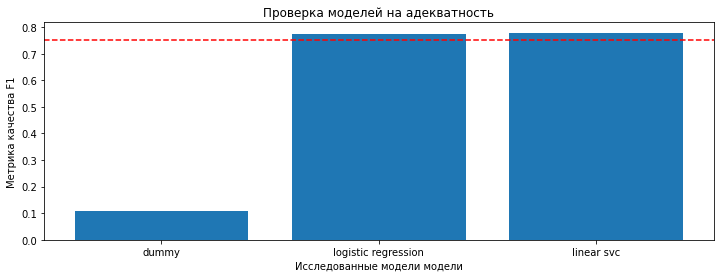

In [47]:
fig, ax = plt.subplots(figsize=(12, 4))
plt.bar(results.index, results.valid_F1)
plt.title('Проверка моделей на адекватность')
plt.axhline(y=0.75, color='r', linestyle='--')
plt.xlabel('Исследованные модели модели')
plt.ylabel('Метрика качества F1')
plt.show()

Пока максимальное качество показала модель линейных опорных векторов.

### Подбор порога

Подобрать подходящий порог для наибольшей метрики качества мы сможем только для модели логистической регрессии, так как у модели линейных опорных векторов нет метода `.predict_proba()`.

Напишем функцию для подбора порога, при котором метрика качества F1 будет иметь максимальное значение.

In [48]:
def threshold_find(start, finish, step, probabilities_one, target, show=True):
    '''функция перебирает указанные элементы диапазона для порога и возращает лучшее значение метрики F1
    start, finish, step - начало, конец и шаг для перебора порога
    probabilities_one_valid - вероятности положительного класса
    target - значения целевого признака
    show - выводить ли на экран значения всех метрик, по умолчанию - выводить'''
    
    f1 = 0
    precision = 0
    recall = 0
    threshold = None
    for step_threshold in np.arange(start, finish, step):
        
        predicted = probabilities_one > step_threshold
        step_f1 = f1_score(target, predicted)
        
        if step_f1 > f1:
            f1 = step_f1
            precision = precision_score(target, predicted)
            recall = recall_score(target, predicted)
            threshold = step_threshold
    if show == True:
        print("Порог = {:.2f} | Полнота = {:.3f}, Точность = {:.3f}".format(
            threshold, recall, precision))
        print('F1: {:.3f}'.format(f1))

    return recall, precision, f1, threshold

Подберем наиболее подходящий порог для модели логистической регрессии.

In [49]:
lr_probabilities_one_valid = lr_model.predict_proba(X_valid)[:, 1]

recall_lr, precision_lr, f1_lr, threshold_lr = threshold_find(
    0.1, 
    0.99, 
    0.01, 
    lr_probabilities_one_valid,
    target_valid
)

Порог = 0.52 | Полнота = 0.720, Точность = 0.843
F1: 0.777


In [50]:
results.loc['logistic regression', 'valid_F1'] = round(f1_lr, 3)
results

,valid_F1
dummy,0.108
logistic regression,0.777
linear svc,0.779


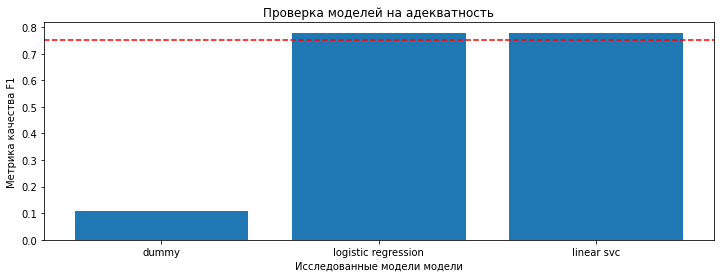

In [51]:
fig, ax = plt.subplots(figsize=(12, 4))
plt.bar(results.index, results.valid_F1)
plt.title('Проверка моделей на адекватность')
plt.axhline(y=0.75, color='r', linestyle='--')
plt.xlabel('Исследованные модели модели')
plt.ylabel('Метрика качества F1')
plt.show()

Даже с подобранным порогом модель линейной регрессии слегка уступает модели линейных опорных векторов.

### Ансамбль смешивания

Далее заинтересовала идея опробовать **ансамбль смешивания**, подробно описанный в [статье](https://habr.com/ru/company/skillfactory/blog/531416/). Для этого  используем две предыдущие модели с уже подобранными гиперпараметрами. Повторим за авторами статьи и будем использовать ансамбль типа пакетирования, где метамодель обучается на прогнозах, сделанных на независимом наборе данных.

У нас на данный момент имеются следующие выборки: `тренировочная`, `валидационная` и `тестовая`, а так же набор выборок `тренировочная + валидационная`.

`Тестовая` зарезервирована для финального тестирования, тогда как остальные - для выбора наиболее удачной модели для данного тестирования. 

Ансамбль смешивания требует наличия еще одной выборки для обучения метамоделей.

Благо мы имеем достаточное количество данных и выделить из тренировочной еще одну выборку для обучения метамодели.

Разделим тренировочную выборку `X_train` на обучающую и валидационную выборки для мета-модели `meta_X_train` и `meta_X_valid`, валидационную выборку не трогаем и сохраним для проверки качества предсказания перед финальным тестированием.

Авторы статьи создавали синтетические данные для задачи бинарной классификации, не требующие предобработки. У нас же данные представлены в виде текста, и нам хотелось бы использовать предобработку данных в виде масштабирования данных с помощью `TF-IDF`. Таким образом, наилучшим вариантом было бы использование не отдельных моделей, а готовых пайплайнов со встроенной предобработкой.



Разделим тестовую выборку на выборки для мета-модели.

In [52]:
meta_X_train, meta_X_valid, meta_target_train, meta_target_valid = train_test_split(
    X_train,
    target_train,
    test_size=0.33,
    random_state=STATE,
    stratify=target_train
)

Далее в статье авторы определяли *функцию `get_models()`, которая возвращает список моделей, где каждая модель определяется как кортеж с названием и настроенным классификатором*

Мы же в отличие от этого, создадим функцию не с моделями, а с пайплайнами с уже подобранными ранее параметрами.

In [53]:
pipe_lr = Pipeline([
    ('vectorizer', TfidfVectorizer(
        stop_words=stop_words,
        ngram_range=(1, 2),
        min_df=3,
        max_df=0.7,
        
    )),
    ('model', LinearSVC(
        class_weight={0: 1, 1: 3}, 
        max_iter=100000, 
        random_state=STATE
    ))
])

pipe_svc = Pipeline([
    ('vectorizer', TfidfVectorizer(
        stop_words=stop_words,
        ngram_range=(1, 2),
        min_df=3,
        max_df=0.7,
        max_features=80000,
        
    )),
    ('model', LinearSVC(
        class_weight={0: 1, 1: 3},
        max_iter=100000,
        random_state=STATE,
        C=0.1,
        penalty='l2',
        tol=1e-10,
    ))
])


pipes = [pipe_lr, pipe_svc]

Авторы статьи пишут после создания моделей:

*Далее нам нужно обучить смешивающую модель. Базовые модели обучаются на тренировочном наборе данных. Метамодель обучается на прогнозах, сделанных каждой базовой моделью на независимом наборе данных.*

*Во-первых, мы можем в цикле перечислить модели в списке и обучить каждую из них по очереди на обучающем наборе данных. Кроме того, в этом цикле мы можем использовать обученную модель, чтобы сделать прогноз на независимом наборе данных (валидации) и сохранить прогнозы на будущее.*

Модифицируем их функцию под нашу задачу.

In [54]:
# fit the blending ensemble
def fit_ensemble(pipes, X_train_meta, X_valid_meta, y_train_meta, y_valid_meta):
# fit all pipes on the training set and predict on hold out set
    meta_X = list()
    for pipe in pipes:
        # fit in training set
        pipe.fit(X_train_meta, y_train_meta)
        # predict on hold out set
        yhat = pipe.predict(X_valid_meta)
        # reshape predictions into a matrix with one column
        yhat = yhat.reshape(len(yhat), 1)
        # store predictions as input for blending
        meta_X.append(yhat)
        # create 2d array from predictions, each set is an input feature
    meta_X = hstack(meta_X)
    # define blending model
    blender = LogisticRegression()
    # fit on predictions from base models
    blender.fit(meta_X, y_valid_meta)
    return blender

Авторы пишут: 

*Теперь у нас есть `meta_X`, представляющий входные данные, которые могут использоваться для обучения метамодели.* 

*Каждый столбец или объект представляет выходные данные одной базовой модели. Каждая строка представляет собой один сэмпл из независимого набора данных.*

*Мы можем применить функцию `hstack()` чтобы гарантировать, что этот набор данных представляет собой двумерный массив numpy, как и ожидалось моделью машинного обучения.*

*Теперь мы можем тренировать нашу метамодель. Это может быть любая модель машинного обучения, которая нам нравится, например логистическая регрессия для задачи классификации.*


*Следующий шаг — **использование смешивающего ансамбля для прогнозирования новых данных**. Это двухэтапный процесс. 

- Первый шаг — использование каждой базовой модели для прогнозирования. 
- Затем прогнозы собираются вместе и используются в качестве входных данных для модели смешивания, чтобы сделать окончательный прогноз.*

*Мы можем использовать тот же цикл, что и при обучении модели. То есть собрать прогнозы каждой базовой модели в обучающий набор данных, сложить прогнозы вместе и вызвать `predict()` в смешивающей модели с этим набором данных метауровня. Функция `predict_ensemble()` ниже реализует эти действия.*

*Учитывая обучение списка базовых моделей, обучение смешивателя ансамбля и набор данных (например, тестовый набор данных или новые данные), для набора данных она вернёт набор прогнозов.*

In [55]:
# make a prediction with the blending ensemble
def predict_ensemble(pipes, blender, X_test):
# make predictions with base pipes
    meta_X = list()
    for pipe in pipes:
        # predict with base model
        yhat = pipe.predict(X_test)
        # reshape predictions into a matrix with one column
        yhat = yhat.reshape(len(yhat), 1)
        # store prediction
        meta_X.append(yhat)
    # create 2d array from predictions, each set is an input feature
    meta_X = hstack(meta_X)
    # predict
    return blender.predict(meta_X)

Теперь у нас есть все элементы, необходимые для реализации смешанного ансамбля.

Оценим размер выборок.

In [56]:
meta_X_train.shape, meta_X_valid.shape, X_valid.shape

((64109,), (31577,), (31896,))

А так же содержание токсичных комментариев в новых выборках.

In [57]:
meta_target_train.mean(), meta_target_valid.mean()

(0.10168619070645307, 0.10168793742280774)

Содержание токсичных комментариев в районе 10%.

Посмотрим, как справиться ансамбль с нашей задачей.

Обучим ансамбль.

In [58]:
%%time
blender = fit_ensemble(pipes, meta_X_train, meta_X_valid, meta_target_train, meta_target_valid)

CPU times: user 20.4 s, sys: 660 ms, total: 21.1 s
Wall time: 21.1 s


Получим предсказания на валидационной выборке (та самая выборка, на которой оценивались по отдельности модели линейной регрессии и линейных опорных векторов).

In [59]:
ensemble_predicts = predict_ensemble(pipes, blender, X_valid)

Посчитаем метрику качества для предсказаний ансамбля.

In [60]:
f1_ensemble = f1_score(target_valid, ensemble_predicts)
print(f'F1 для ансамбля смешивания равно {f1_ensemble:.3f}')

F1 для ансамбля смешивания равно 0.765


Качество от ансамбля получилось меньше ожидаемого и хуже, чем от использованных в нем моделей поотдельности.

In [61]:
results.loc['ensemble', 'valid_F1'] = round(f1_ensemble, 3)
results

,valid_F1
dummy,0.108
logistic regression,0.777
linear svc,0.779
ensemble,0.765


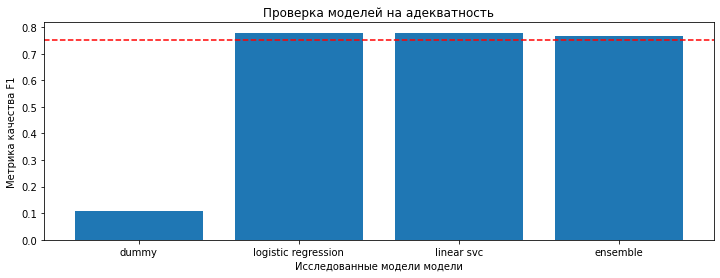

In [62]:
fig, ax = plt.subplots(figsize=(12, 4))
plt.bar(results.index, results.valid_F1)
plt.title('Проверка моделей на адекватность')
plt.axhline(y=0.75, color='r', linestyle='--')
plt.xlabel('Исследованные модели модели')
plt.ylabel('Метрика качества F1')
plt.show()

- Модели обучаются достаточно долго, обучать некоторые модели не поднялась рука (например, случайного леса и градиентного бустинга).
- Для финального тестирования выбрана **модель линейных опорных векторов**.

## Тестирование

Обучим модель линейных опорных векторов на `тренировочной + валидационная` выборках и проверим на `тестировочной`.

In [63]:
%%time
svc_model.fit(X_train_valid, target_train_valid)
svc_predicts_final = svc_model.predict(X_test)
f1_svc_final = f1_score(target_test, svc_predicts_final)
print(f'F1 на тестовой выборке для модели линейных опорных векторов равно {f1_svc_final:.3f}')
print()

F1 на тестовой выборке для модели линейных опорных векторов равно 0.794

CPU times: user 20.8 s, sys: 686 ms, total: 21.5 s
Wall time: 21.6 s


## Выводы

Данный проект был посвященн **поиску токсичных комментариев для интернет-магазина**. 

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. 

Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию.

Нашей **задачей** являлось обучить модель **классифицировать комментарии на позитивные и негативные**.

Необходимым условием было построить модель со значением метрики качества **F1 не меньше 0.75**.

В рамках данной работы была проведена **предобработка текста** с приведением комментариев к нижнему регистру, удалению ссылок и лемматизацией. 

Для обучения моделей классифицировать комментарии была применена техника масштабирования данных с помощью **TF-IDF**.

В рамках проекта были обучены модели логистической регрессии и линейных опорных векторов. 


Ввиду ресурсозатратности проекта, приходилось предварительно уменьшать датасет до 5 тысяч строк и на них тестировать, работает ли всё как задуманно. Самый убийственный проект, я думала, у меня загорится комп. И даже оплата Гугл Колаба не особо ускорила процесс, хотя надеюсь, что ускорила. 

Для финального **тестирования** была выбрана **модель линейных опорных векторов**, лучше показавшая себя на кросс-валидации.

**Метрика качества F1** на тестовой выборке равна **0.79**, что согласуется с целью исследования, а так же показывает то, что модель не переобучилась.

